# Capstone Project 1 - Data Story
## Name: Brock Nosbisch

#### Summary:
This is a continuation from the "Capstone Project 1 - Data Wrangling" notebook.  The data from the "Data Wrangling" notebooks was written to the data_wrangling_out.csv file which is read in below.

# Load Data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_name = 'data_wrangling_out.csv'
df = pd.read_csv(file_name, header=0, na_values ='-1')
df.set_index('id', inplace=True)

# Reorder columns
new_col_ordering = [ 'age', 'age_bucket', 'age_bucket_name', 'debt_ratio', 'debt_ratio_bucket', 'debt_ratio_name',
                    'monthly_income', 'monthly_income_bucket', 'monthly_income_name', 
                    'past_due_30_59', 'past_due_30_59_flag', 
                    'past_due_60_89', 'past_due_60_89_flag', 
                    'past_due_90_plus', 'past_due_90_plus_flag',
                    'open_credit_lines', 'serious_delinquent', 'unsecured_lines', 
                    'real_estate_loans', 'number_of_dependents']
df = df[new_col_ordering]

# Creation Functions Used.
def add_value_labels(ax, spacing=5):

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            # Vertical alignment
            va = 'top'

        label = "{:}".format(y_value)  # Use :.1f if wanting decimals.

        # Create annotation
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va) 

# Data Story

### Out of the original 150,000 records in the dataset, we have removed 1 record for Age = 0 and 269 records for having Past Due values of > 25.

In [34]:
df.describe()

,age,age_bucket,debt_ratio,debt_ratio_bucket,debt_ratio_name,monthly_income,monthly_income_bucket,past_due_30_59,past_due_30_59_flag,past_due_60_89,past_due_60_89_flag,past_due_90_plus,past_due_90_plus_flag,open_credit_lines,serious_delinquent,unsecured_lines,real_estate_loans,number_of_dependents
count,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,1.201200e+05,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,149730.000000,145837.000000
mean,52.327984,3.783450,353.631316,4.499426,127.596762,6.675295e+03,3.888967,0.245789,0.158365,0.064823,0.048988,0.090456,0.053890,8.467949,0.065979,6.057542,1.020063,0.757846
std,14.754371,1.503563,2039.601344,2.871689,380.775754,1.439255e+04,2.316560,0.697779,0.365084,0.330074,0.215844,0.485529,0.225802,5.138107,0.248246,249.980364,1.129961,1.115382
min,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,3.000000,0.175994,2.000000,0.134926,3.400000e+03,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.029771,0.000000,0.000000
50%,52.000000,4.000000,0.367119,4.500000,0.327622,5.400000e+03,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.153488,1.000000,0.000000
75%,63.000000,5.000000,0.870023,7.000000,0.650162,8.250000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.555592,2.000000,1.000000
max,109.000000,9.000000,329664.000000,9.000000,1270.000000,3.008750e+06,9.000000,13.000000,1.000000,11.000000,1.000000,17.000000,1.000000,58.000000,1.000000,50708.000000,54.000000,20.000000


### We know that there are ~30k records where the Monthly Income was NULL.  Let's see how excluding those NULL values changes the describe stats.  Excluding those NULL Monthly Incomes brought down up the Monthly Income Average and decreased the Debt Ratio Average but Past Due 90+ and Serious Delinquency stayed about the same. 

In [35]:
df[:][df['monthly_income'] >= 0].describe()

,age,age_bucket,debt_ratio,debt_ratio_bucket,debt_ratio_name,monthly_income,monthly_income_bucket,past_due_30_59,past_due_30_59_flag,past_due_60_89,past_due_60_89_flag,past_due_90_plus,past_due_90_plus_flag,open_credit_lines,serious_delinquent,unsecured_lines,real_estate_loans,number_of_dependents
count,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,1.201200e+05,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000,120120.000000
mean,51.309232,3.681494,26.631760,3.626457,9.284930,6.675295e+03,4.847611,0.261555,0.167749,0.067383,0.051007,0.091508,0.054754,8.769272,0.068873,5.905950,1.055811,0.852173
std,14.417093,1.470748,424.708591,2.342709,106.304529,1.439255e+04,1.429034,0.719067,0.373645,0.336565,0.220014,0.489231,0.227500,5.166914,0.253239,257.199999,1.149386,1.148539
min,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,3.000000,0.144103,2.000000,0.134926,3.400000e+03,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.034979,0.000000,0.000000
50%,51.000000,4.000000,0.296344,4.000000,0.288126,5.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.176695,1.000000,0.000000
75%,61.000000,5.000000,0.482859,6.000000,0.468174,8.250000e+03,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.577123,2.000000,2.000000
max,103.000000,9.000000,61106.500000,9.000000,1270.000000,3.008750e+06,9.000000,13.000000,1.000000,11.000000,1.000000,17.000000,1.000000,58.000000,1.000000,50708.000000,54.000000,20.000000


## Age vs. Past Due 90+ Days



### Viewing the Ages by Past Due 90+ days shows us that the younger you are, the more likely you are to to be 90+ days late.

In [46]:
df.groupby('age_bucket_name')['past_due_90_plus_flag'].describe()

,count,mean,std,min,25%,50%,75%,max
age_bucket_name,,,,,,,,
20-29,8677.0,0.092544,0.289808,0.0,0.0,0.0,0.0,1.0
30-39,23139.0,0.080859,0.272625,0.0,0.0,0.0,0.0,1.0
40-49,34342.0,0.063829,0.244451,0.0,0.0,0.0,0.0,1.0
50-59,35268.0,0.053023,0.224082,0.0,0.0,0.0,0.0,1.0
60-69,28893.0,0.033814,0.180754,0.0,0.0,0.0,0.0,1.0
70-79,13599.0,0.019854,0.139505,0.0,0.0,0.0,0.0,1.0
80-89,5125.0,0.014634,0.120095,0.0,0.0,0.0,0.0,1.0
90-99,674.0,0.016320,0.126799,0.0,0.0,0.0,0.0,1.0
Over 100,13.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


### As seen above, here are the total counts in each Age range.

Examine the number of records we have per Age range.



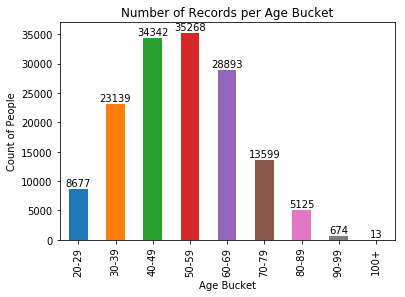

In [27]:

age_bucket_col_names = ('20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99', '100+')
age_bucket_plot = df.groupby('age_bucket_name')['past_due_90_plus_flag'].count().plot(kind='bar')
age_bucket_plot.set_title('Number of Records per Age Bucket')
age_bucket_plot.set_xlabel('Age Bucket')
age_bucket_plot.set_ylabel('Count of People')
age_bucket_plot.set_xticklabels(age_bucket_col_names)
add_value_labels(age_bucket_plot,1)

plt.show()


### These are the total counts of those Age ranges that have been Past Due 90+ days.

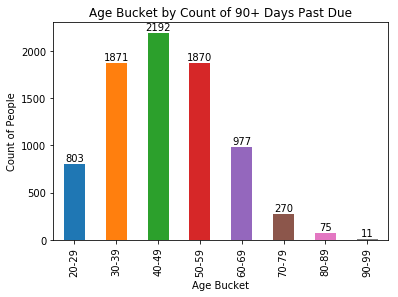

In [51]:
age_bucket_plot = df[(df['past_due_90_plus'] > 0)].groupby('age_bucket_name')['past_due_90_plus_flag'].count().plot(kind='bar')
age_bucket_plot.set_title('Age Bucket by Count of 90+ Days Past Due')
age_bucket_plot.set_xlabel('Age Bucket')
age_bucket_plot.set_ylabel('Count of People')
age_bucket_plot.set_xticklabels(age_bucket_col_names)
add_value_labels(age_bucket_plot,1)
plt.show()

### And here are the averages of Past Due 90+ days by Age range.  We observe that the younger you are, the higher chance that you will be 90+ days late. (as previously mentioned)

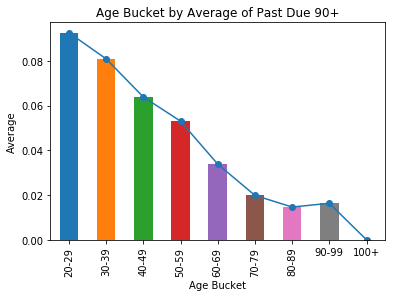

In [53]:
ax =df.groupby('age_bucket_name')['past_due_90_plus_flag'].mean().plot(x='age_bucket_name', linestyle='-', marker='o')
age_bucket_plot2 = df.groupby('age_bucket_name')['past_due_90_plus_flag'].mean().plot(kind='bar', ax=ax)
age_bucket_plot2.set_title('Age Bucket by Average of Past Due 90+')
age_bucket_plot2.set_xlabel('Age Bucket')
age_bucket_plot2.set_ylabel('Average')
age_bucket_plot2.set_xticklabels(age_bucket_col_names)
plt.show()



### Here we can see Past Due 90+ vs Total Sampled Count by Actual Age.  This is just another view of confirming that the younger Ages have a higher Probability of being 90+ day late.

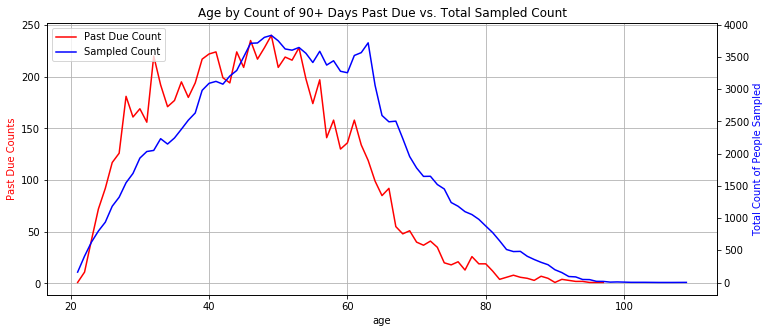

In [69]:
plt.figure(figsize=(12,5))
age_bucket_plot = df[(df['past_due_90_plus'] > 0)].groupby('age')['past_due_90_plus_flag'].count().plot(kind='line', color='red', grid=True, label='Past Due Count')
age_bucket_plot.set_title('Age by Count of 90+ Days Past Due vs. Total Sampled Count')
age_bucket_plot.set_xlabel('Age')
age_bucket_plot.set_ylabel('Past Due Counts', color='red')

age_bucket_plot2.name = 'Sampled Count'
age_bucket_plot2 = df.groupby('age')['past_due_90_plus_flag'].count().plot(color='blue', grid=True, secondary_y=True, label='Sampled Count')
age_bucket_plot2.set_ylabel('Total Count of People Sampled', color='blue')
h1, l1 = age_bucket_plot.get_legend_handles_labels()
h2, l2 = age_bucket_plot2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)

plt.show()

## Age vs. Past Due 60-89 Days



### Like the Past Due 90+ data, viewing Ages by Past Due 60-89 Days shows us that the younger you are, the more likely you are to to be 60-89 days late.
### I want to make sure it is clear that being flagged as 60-89 days late means that you were at least 60 days late but paid before day 90.

In [61]:
df.groupby('age_bucket_name')['past_due_60_89_flag'].describe()

,count,mean,std,min,25%,50%,75%,max
age_bucket_name,,,,,,,,
20-29,8677.0,0.070647,0.256248,0.0,0.0,0.0,0.0,1.0
30-39,23139.0,0.067592,0.251049,0.0,0.0,0.0,0.0,1.0
40-49,34342.0,0.060625,0.238646,0.0,0.0,0.0,0.0,1.0
50-59,35268.0,0.050045,0.218042,0.0,0.0,0.0,0.0,1.0
60-69,28893.0,0.032395,0.177051,0.0,0.0,0.0,0.0,1.0
70-79,13599.0,0.019193,0.137206,0.0,0.0,0.0,0.0,1.0
80-89,5125.0,0.019122,0.136967,0.0,0.0,0.0,0.0,1.0
90-99,674.0,0.023739,0.152348,0.0,0.0,0.0,0.0,1.0
Over 100,13.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


### These are the total counts of those Age ranges that have been Past Due 60-89 Days.


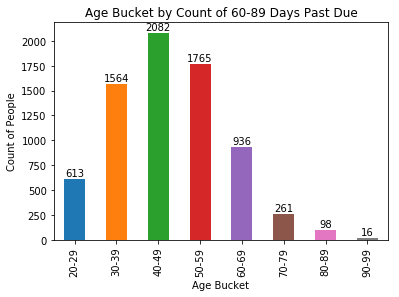

In [66]:
age_bucket_plot = df[(df['past_due_60_89_flag'] > 0)].groupby('age_bucket_name')['past_due_60_89_flag'].count().plot(kind='bar')
age_bucket_plot.set_title('Age Bucket by Count of 60-89 Days Past Due')
age_bucket_plot.set_xlabel('Age Bucket')
age_bucket_plot.set_ylabel('Count of People')
age_bucket_plot.set_xticklabels(age_bucket_col_names)
add_value_labels(age_bucket_plot,1)
plt.show()

### And here are the averages of Past Due 60-89 Days by Age range.  We observe that the younger you are, the higher chance that you will be 60-89 days late. (as previously mentioned)

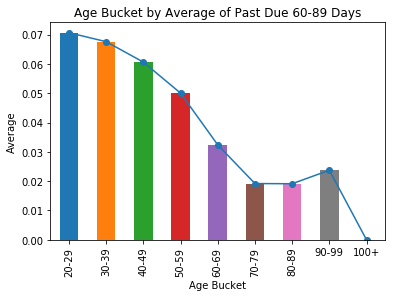

In [65]:
ax =df.groupby('age_bucket_name')['past_due_60_89_flag'].mean().plot(x='age_bucket_name', linestyle='-', marker='o')
age_bucket_plot2 = df.groupby('age_bucket_name')['past_due_60_89_flag'].mean().plot(kind='bar', ax=ax)
age_bucket_plot2.set_title('Age Bucket by Average of Past Due 60-89 Days')
age_bucket_plot2.set_xlabel('Age Bucket')
age_bucket_plot2.set_ylabel('Average')
age_bucket_plot2.set_xticklabels(age_bucket_col_names)
plt.show()



### Here we can see Past Due 60-89 Days vs Total Sampled Count by Actual Age.  This is just another view of confirming that the younger Ages have a higher Probability of being 60-89 days late.

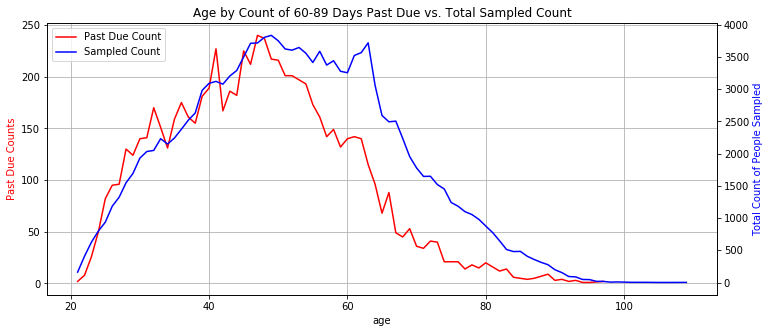

In [70]:
plt.figure(figsize=(12,5))
age_bucket_plot = df[(df['past_due_60_89_flag'] > 0)].groupby('age')['past_due_60_89_flag'].count().plot(kind='line', color='red', grid=True, label='Past Due Count')
age_bucket_plot.set_title('Age by Count of 60-89 Days Past Due vs. Total Sampled Count')
age_bucket_plot.set_xlabel('Age')
age_bucket_plot.set_ylabel('Past Due Counts', color='red')

age_bucket_plot2.name = 'Sampled Count'
age_bucket_plot2 = df.groupby('age')['past_due_60_89_flag'].count().plot(color='blue', grid=True, secondary_y=True, label='Sampled Count')
age_bucket_plot2.set_ylabel('Total Count of People Sampled', color='blue')
h1, l1 = age_bucket_plot.get_legend_handles_labels()
h2, l2 = age_bucket_plot2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)

plt.show()

## Age vs. Past Due 30-59 Days



### Like the other Past Due data, viewing Ages by Past Due 30-59 Days shows us, for the most part, that the younger you are, the more likely you are to to be 30-59 days late.
### Again, I want to make sure it is clear that being flagged as 30-59 days late means that you were at least 30 days late but paid before day 60.

In [72]:
df.groupby('age_bucket_name')['past_due_30_59_flag'].describe()

,count,mean,std,min,25%,50%,75%,max
age_bucket_name,,,,,,,,
20-29,8677.0,0.161231,0.367765,0.0,0.0,0.0,0.0,1.0
30-39,23139.0,0.187951,0.390682,0.0,0.0,0.0,0.0,1.0
40-49,34342.0,0.193873,0.395337,0.0,0.0,0.0,0.0,1.0
50-59,35268.0,0.174606,0.379635,0.0,0.0,0.0,0.0,1.0
60-69,28893.0,0.125324,0.331092,0.0,0.0,0.0,0.0,1.0
70-79,13599.0,0.081918,0.274250,0.0,0.0,0.0,0.0,1.0
80-89,5125.0,0.070439,0.255910,0.0,0.0,0.0,0.0,1.0
90-99,674.0,0.075668,0.264662,0.0,0.0,0.0,0.0,1.0
Over 100,13.0,0.076923,0.277350,0.0,0.0,0.0,0.0,1.0


### These are the total counts of those Age ranges that have been Past Due 30-59 Days.


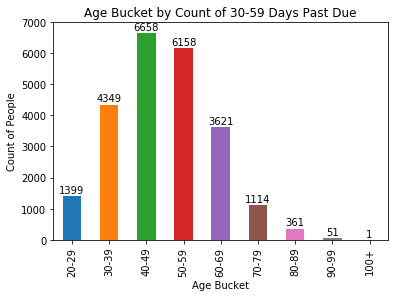

In [73]:
age_bucket_plot = df[(df['past_due_30_59_flag'] > 0)].groupby('age_bucket_name')['past_due_30_59_flag'].count().plot(kind='bar')
age_bucket_plot.set_title('Age Bucket by Count of 30-59 Days Past Due')
age_bucket_plot.set_xlabel('Age Bucket')
age_bucket_plot.set_ylabel('Count of People')
age_bucket_plot.set_xticklabels(age_bucket_col_names)
add_value_labels(age_bucket_plot,1)
plt.show()

### And here are the averages of Past Due 30-59 Days by Age range.  We observe that the younger you are, the higher chance that you will be 30-59 days late but do note that the 40-49 Age Range has the highest probability of being 30-59 days past due.

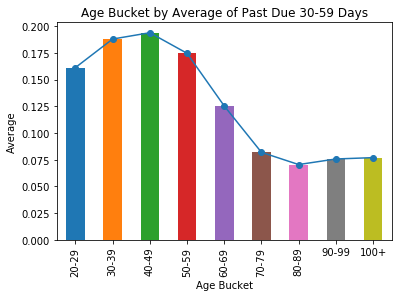

In [74]:
ax =df.groupby('age_bucket_name')['past_due_30_59_flag'].mean().plot(x='age_bucket_name', linestyle='-', marker='o')
age_bucket_plot2 = df.groupby('age_bucket_name')['past_due_30_59_flag'].mean().plot(kind='bar', ax=ax)
age_bucket_plot2.set_title('Age Bucket by Average of Past Due 30-59 Days')
age_bucket_plot2.set_xlabel('Age Bucket')
age_bucket_plot2.set_ylabel('Average')
age_bucket_plot2.set_xticklabels(age_bucket_col_names)
plt.show()



### Here we can see Past Due 30-59 Days vs Total Sampled Count by Actual Age.  

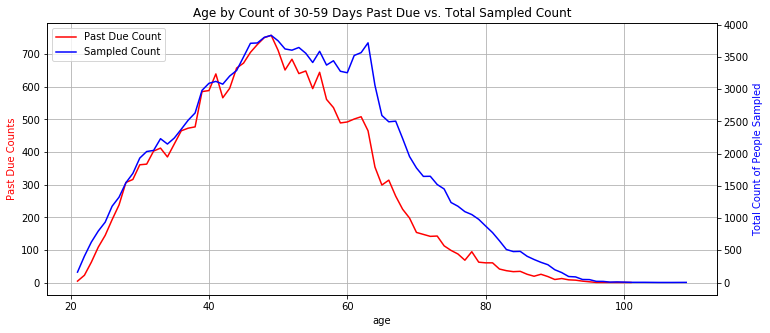

In [76]:
plt.figure(figsize=(12,5))
age_bucket_plot = df[(df['past_due_30_59_flag'] > 0)].groupby('age')['past_due_30_59_flag'].count().plot(kind='line', color='red', grid=True, label='Past Due Count')
age_bucket_plot.set_title('Age by Count of 30-59 Days Past Due vs. Total Sampled Count')
age_bucket_plot.set_xlabel('Age')
age_bucket_plot.set_ylabel('Past Due Counts', color='red')

age_bucket_plot2.name = 'Sampled Count'
age_bucket_plot2 = df.groupby('age')['past_due_30_59_flag'].count().plot(color='blue', grid=True, secondary_y=True, label='Sampled Count')
age_bucket_plot2.set_ylabel('Total Count of People Sampled', color='blue')
h1, l1 = age_bucket_plot.get_legend_handles_labels()
h2, l2 = age_bucket_plot2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)

plt.show()

### Counts by 30-59, 60-89, and 90+ Days Past Due by Actual Age

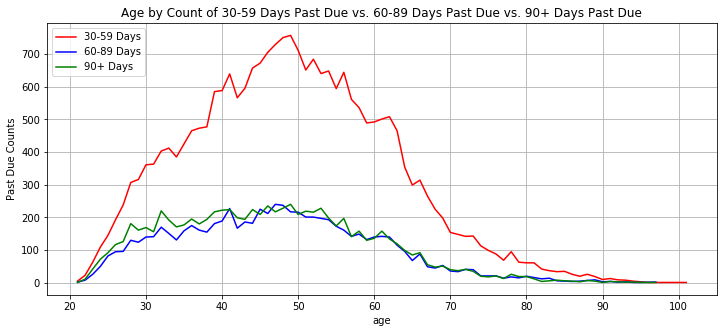

In [90]:
plt.figure(figsize=(12,5))
age_bucket_plot = df[(df['past_due_30_59_flag'] > 0)].groupby('age')['past_due_30_59_flag'].count().plot(kind='line', color='red', grid=True, label='30-59 Days')
age_bucket_plot.set_title('Age by Count of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due')
age_bucket_plot.set_xlabel('Age')
age_bucket_plot.set_ylabel('Past Due Counts')

age_bucket_plot2 = df[(df['past_due_60_89_flag'] > 0)].groupby('age')['past_due_60_89_flag'].count().plot(kind='line', color='blue', grid=True, label='60-89 Days')
#age_bucket_plot2.set_title('Age by Count of 60-89 Days Past Due vs. Total Sampled Count')
#age_bucket_plot2.set_xlabel('Age')
#age_bucket_plot2.set_ylabel('Past Due Counts', color='blue')

age_bucket_plot3 = df[(df['past_due_90_plus_flag'] > 0)].groupby('age')['past_due_90_plus_flag'].count().plot(kind='line', color='green', grid=True, label='90+ Days')
#age_bucket_plot3.set_title('Age by Count of 60-89 Days Past Due vs. Total Sampled Count')
#age_bucket_plot3.set_xlabel('Age')
#age_bucket_plot3.set_ylabel('Past Due Counts', color='blue')

#age_bucket_plot2.name = 'Sampled Count'
#age_bucket_plot2 = df.groupby('age')['past_due_30_59_flag'].count().plot(color='blue', grid=True, secondary_y=True, label='Sampled Count')
#age_bucket_plot2.set_ylabel('Total Count of People Sampled', color='blue')
h1, l1 = age_bucket_plot.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.show()

### Averages by 30-59, 60-89, and 90+ Days Past Due by Actual Age
### But this doesn't really give you a good idea when doing by Age, so I will plot it by Age Range next.

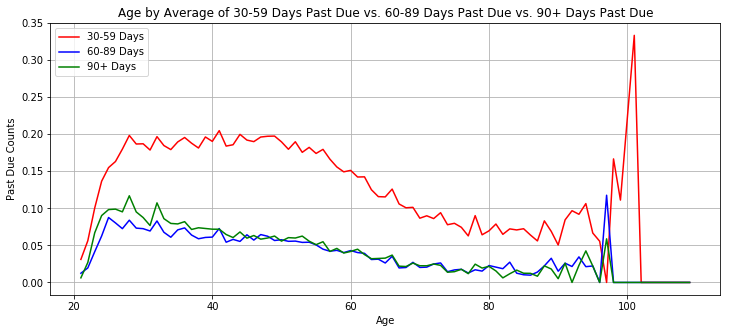

In [96]:
plt.figure(figsize=(12,5))
age_bucket_plot = df.groupby('age')['past_due_30_59_flag'].mean().plot(kind='line', color='red', grid=True, label='30-59 Days')

age_bucket_plot2 = df.groupby('age')['past_due_60_89_flag'].mean().plot(kind='line', color='blue', grid=True, label='60-89 Days')
age_bucket_plot3 = df.groupby('age')['past_due_90_plus_flag'].mean().plot(kind='line', color='green', grid=True, label='90+ Days')
age_bucket_plot.set_title('Age by Average of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due')
age_bucket_plot.set_xlabel('Age')
age_bucket_plot.set_ylabel('Past Due Counts')

h1, l1 = age_bucket_plot.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.show()

### Averages by 30-59, 60-89, and 90+ Days Past Due by Age Bucket
### This is a good graph to see that if the averages for those who go 60-89 Days Past Due  are about the same as those who go 90+ Days Past Due.

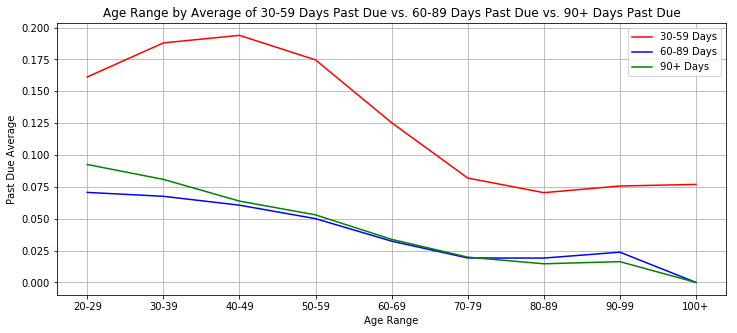

In [125]:
plt.figure(figsize=(12,5))
age_bucket_plot = df.groupby('age_bucket')['past_due_30_59_flag'].mean().plot(kind='line', color='red', grid=True, label='30-59 Days')
age_bucket_plot.set_title('Age Range by Average of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due')

age_bucket_plot2 = df.groupby('age_bucket')['past_due_60_89_flag'].mean().plot(kind='line', color='blue', grid=True, label='60-89 Days')
age_bucket_plot3 = df.groupby('age_bucket')['past_due_90_plus_flag'].mean().plot(kind='line', color='green', grid=True, label='90+ Days')

age_bucket_plot.set_xlabel('Age Range')
age_bucket_plot.set_ylabel('Past Due Average')

age_bucket_col_names2 = ('', '20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99', '100+')
age_bucket_plot.set_xticklabels(age_bucket_col_names2)

h1, l1 = age_bucket_plot.get_legend_handles_labels()

plt.legend(h1, l1, loc=1)

plt.show()

## Monthly Income vs. Past Due 90+

### Viewing the Monthly Income by Past Due 90+ days shows us that the Monthly Income Buckets of 1000-2499 and 2500-4999 have the highest average of being Past Due 90+.  And as I expected, the more a person earns means that they have a less likely chance of being 90+ days late.

In [58]:
df.groupby(['monthly_income_bucket','monthly_income_name'])['past_due_90_plus_flag'].describe()

,,count,mean,std,min,25%,50%,75%,max
monthly_income_bucket,monthly_income_name,,,,,,,,
0,No Value,29610.0,0.050388,0.218749,0.0,0.0,0.0,0.0,1.0
1,0-499,2680.0,0.039552,0.194941,0.0,0.0,0.0,0.0,1.0
2,500-999,1722.0,0.063879,0.244609,0.0,0.0,0.0,0.0,1.0
3,1000-2499,12069.0,0.082940,0.275803,0.0,0.0,0.0,0.0,1.0
4,2500-4999,36493.0,0.074973,0.263352,0.0,0.0,0.0,0.0,1.0
5,5000-7499,30358.0,0.049904,0.217751,0.0,0.0,0.0,0.0,1.0
6,7500-9999,17014.0,0.034266,0.181917,0.0,0.0,0.0,0.0,1.0
7,10000-24999,18475.0,0.026143,0.159566,0.0,0.0,0.0,0.0,1.0
8,25000-49999,988.0,0.027328,0.163120,0.0,0.0,0.0,0.0,1.0


### There are a few outliers in the Monthly Income values.

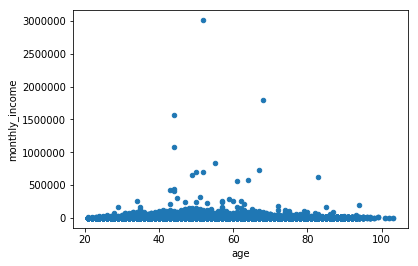

In [149]:
df.plot(x='age',
        y='monthly_income',
       kind='scatter')

plt.show()

### When excluding Monthly Income Values > $50k, we can see that middle aged (50-60) people get paid the most

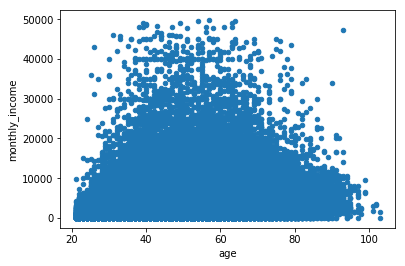

In [151]:
df[:][df['monthly_income'] < 50000].plot(x='age',
        y='monthly_income',
       kind='scatter')

plt.show()

### These are the total counts of those Monthly Income Ranges.


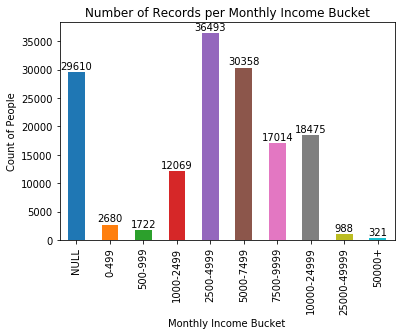

In [101]:
monthly_income_bucket_col_names = ('NULL','0-499', '500-999', '1000-2499', '2500-4999', '5000-7499', '7500-9999', '10000-24999', '25000-49999','50000+')
monthly_income_bucket_plot = df[(df['past_due_90_plus'] < 90)].groupby('monthly_income_bucket')['past_due_90_plus'].count().plot(kind='bar')
monthly_income_bucket_plot.set_title('Number of Records per Monthly Income Bucket')
monthly_income_bucket_plot.set_xlabel('Monthly Income Bucket')
monthly_income_bucket_plot.set_ylabel('Count of People')
monthly_income_bucket_plot.set_xticklabels(monthly_income_bucket_col_names)
add_value_labels(monthly_income_bucket_plot,1)
plt.show()

### These are the total counts of those Monthly Income ranges that have been Past Due 90+ Days.


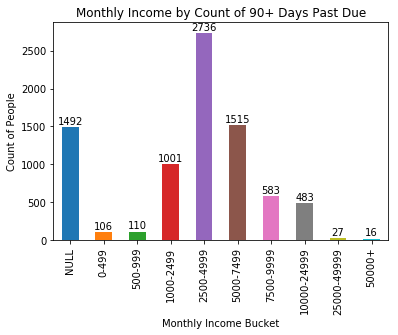

In [102]:
monthly_income_bucket_plot = df[(df['past_due_90_plus'] > 0)].groupby('monthly_income_bucket')['past_due_90_plus_flag'].count().plot(kind='bar')
monthly_income_bucket_plot.set_title('Monthly Income by Count of 90+ Days Past Due')
monthly_income_bucket_plot.set_xlabel('Monthly Income Bucket')
monthly_income_bucket_plot.set_ylabel('Count of People')
monthly_income_bucket_plot.set_xticklabels(monthly_income_bucket_col_names)
add_value_labels(monthly_income_bucket_plot,1)
plt.show()

### And here are the averages of Past Due 90+ Days by Monthly Income range.  We observe that the 1000-2499 and 2500-4999 Monthly Income Ranges have the highest probability of being 90+ Days Past Due.

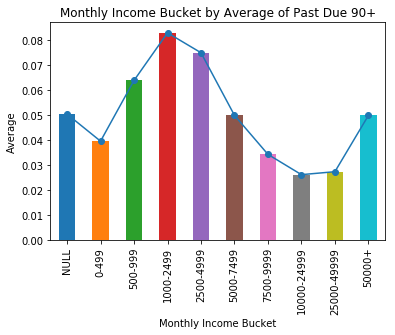

In [105]:
# This graph is showing the averages of Past Due 90+ Days by Monthly Income Bucket. (Excluding 96/98)
ax = df.groupby('monthly_income_bucket')['past_due_90_plus_flag'].mean().plot(x='monthly_income_bucket', linestyle='-', marker='o')
monthly_income_bucket_plot = df.groupby('monthly_income_bucket')['past_due_90_plus_flag'].mean().plot(kind='bar', ax=ax)
monthly_income_bucket_plot.set_title('Monthly Income Bucket by Average of Past Due 90+')
monthly_income_bucket_plot.set_xlabel('Monthly Income Bucket')
monthly_income_bucket_plot.set_ylabel('Average')
monthly_income_bucket_plot.set_xticklabels(monthly_income_bucket_col_names)
plt.show()

### And here are the averages of the Past Due 60-89 Days by Monthly Income range.  The averages are showing about the same trends as 90+ days past due.

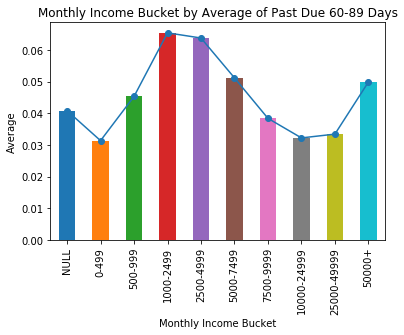

In [106]:
# This graph is showing the averages of Past Due 60-89 Days by Monthly Income Bucket.
ax = df.groupby('monthly_income_bucket')['past_due_60_89_flag'].mean().plot(x='monthly_income_bucket', linestyle='-', marker='o')
monthly_income_bucket_plot = df.groupby('monthly_income_bucket')['past_due_60_89_flag'].mean().plot(kind='bar', ax=ax)
monthly_income_bucket_plot.set_title('Monthly Income Bucket by Average of Past Due 60-89 Days')
monthly_income_bucket_plot.set_xlabel('Monthly Income Bucket')
monthly_income_bucket_plot.set_ylabel('Average')
monthly_income_bucket_plot.set_xticklabels(monthly_income_bucket_col_names)
plt.show()

### And here are the averages of the Past Due 30-59 Days by Monthly Income range.  The averages are flatter across the monthly income ranges starting at 1000-2499 and higher.

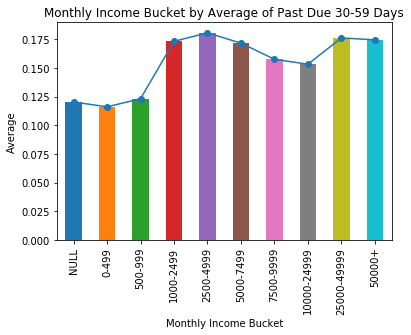

In [108]:
# This graph is showing the averages of Past Due 30-59 Days by Monthly Income Bucket.
ax = df.groupby('monthly_income_bucket')['past_due_30_59_flag'].mean().plot(x='monthly_income_bucket', linestyle='-', marker='o')
monthly_income_bucket_plot = df.groupby('monthly_income_bucket')['past_due_30_59_flag'].mean().plot(kind='bar', ax=ax)
monthly_income_bucket_plot.set_title('Monthly Income Bucket by Average of Past Due 30-59 Days')
monthly_income_bucket_plot.set_xlabel('Monthly Income Bucket')
monthly_income_bucket_plot.set_ylabel('Average')
monthly_income_bucket_plot.set_xticklabels(monthly_income_bucket_col_names)
plt.show()

### Averages by 30-59, 60-89, and 90+ Days Past Due by Monthly Income Range
### This is a good graph to see that if the averages for those who go 60-89 Days Past Due are about the same as those who go 90+ Days Past Due.

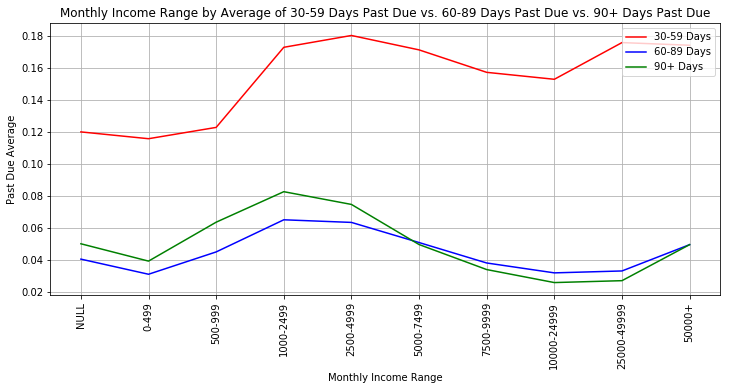

In [147]:
plt.figure(figsize=(12,5))
monthly_income_bucket_plot = df.groupby('monthly_income_bucket')['past_due_30_59_flag'].mean().plot(kind='line', color='red', grid=True, label='30-59 Days')
monthly_income_bucket_plot.set_title('Monthly Income Range by Average of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due')

monthly_income_bucket_plot2 = df.groupby('monthly_income_bucket')['past_due_60_89_flag'].mean().plot(kind='line', color='blue', grid=True, label='60-89 Days')
monthly_income_bucket_plot3 = df.groupby('monthly_income_bucket')['past_due_90_plus_flag'].mean().plot(kind='line', color='green', grid=True, label='90+ Days')

monthly_income_bucket_plot.set_xlabel('Monthly Income Range')
monthly_income_bucket_plot.set_ylabel('Past Due Average')

plt.xticks(rotation=90)
monthly_income_bucket_plot.set_xticks(np.arange(len(monthly_income_bucket_col_names)))

monthly_income_bucket_plot.set_xticklabels(monthly_income_bucket_col_names)
add_value_labels(monthly_income_bucket_plot,2)
h1, l1 = monthly_income_bucket_plot.get_legend_handles_labels()

plt.legend(h1, l1, loc=1)

plt.show()

## Debt Ratio

### There are a few outliers in Debt Ratio by Age

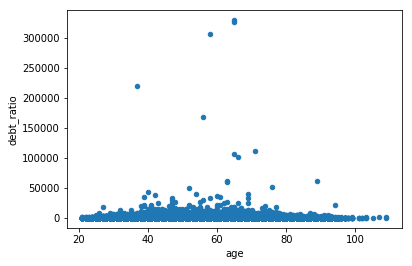

In [154]:
df.plot(x='age',
        y='debt_ratio',
       kind='scatter')

plt.show()

### Average of Debt Ratio Quantiles by Past Due 90+ Days. 

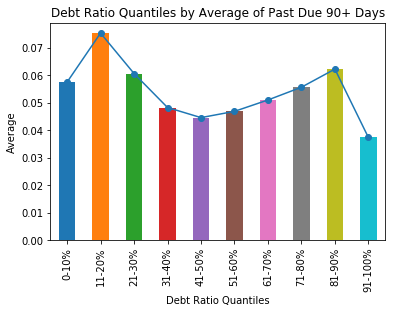

In [164]:

ax = df.groupby('debt_ratio_bucket')['past_due_90_plus_flag'].mean().plot(x='debt_ratio_bucket', linestyle='-', marker='o')
debt_ratio_plot = df.groupby('debt_ratio_bucket')['past_due_90_plus_flag'].mean().plot(kind='bar', ax=ax)
debt_ratio_plot.set_title('Debt Ratio Quantiles by Average of Past Due 90+ Days')
debt_ratio_plot.set_xlabel('Debt Ratio Quantiles')
debt_ratio_plot.set_ylabel('Average')
debt_ratio_plot.set_xticklabels(debt_ratio_column_names)
plt.show()

### Average of Debt Ratio Quantiles by Past Due 60-89 Days. 

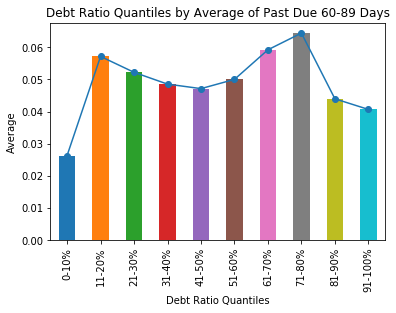

In [165]:

ax = df.groupby('debt_ratio_bucket')['past_due_60_89_flag'].mean().plot(x='debt_ratio_bucket', linestyle='-', marker='o')
debt_ratio_plot = df.groupby('debt_ratio_bucket')['past_due_60_89_flag'].mean().plot(kind='bar', ax=ax)
debt_ratio_plot.set_title('Debt Ratio Quantiles by Average of Past Due 60-89 Days')
debt_ratio_plot.set_xlabel('Debt Ratio Quantiles')
debt_ratio_plot.set_ylabel('Average')
debt_ratio_plot.set_xticklabels(debt_ratio_column_names)
plt.show()

### Average of Debt Ratio Quantiles by Past Due 30-59 Days. 

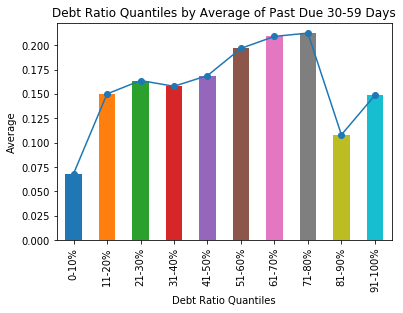

In [166]:

ax = df.groupby('debt_ratio_bucket')['past_due_30_59_flag'].mean().plot(x='debt_ratio_bucket', linestyle='-', marker='o')
debt_ratio_plot = df.groupby('debt_ratio_bucket')['past_due_30_59_flag'].mean().plot(kind='bar', ax=ax)
debt_ratio_plot.set_title('Debt Ratio Quantiles by Average of Past Due 30-59 Days')
debt_ratio_plot.set_xlabel('Debt Ratio Quantiles')
debt_ratio_plot.set_ylabel('Average')
debt_ratio_plot.set_xticklabels(debt_ratio_column_names)
plt.show()

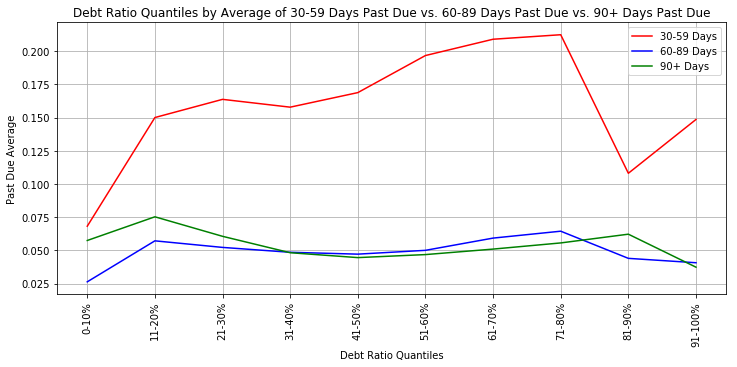

In [168]:
plt.figure(figsize=(12,5))
debt_ratio_plot = df.groupby('debt_ratio_bucket')['past_due_30_59_flag'].mean().plot(kind='line', color='red', grid=True, label='30-59 Days')
debt_ratio_plot.set_title('Debt Ratio Quantiles by Average of 30-59 Days Past Due vs. 60-89 Days Past Due vs. 90+ Days Past Due')

debt_ratio_plot2 = df.groupby('debt_ratio_bucket')['past_due_60_89_flag'].mean().plot(kind='line', color='blue', grid=True, label='60-89 Days')
debt_ratio_plot3 = df.groupby('debt_ratio_bucket')['past_due_90_plus_flag'].mean().plot(kind='line', color='green', grid=True, label='90+ Days')

debt_ratio_plot.set_xlabel('Debt Ratio Quantiles')
debt_ratio_plot.set_ylabel('Past Due Average')

plt.xticks(rotation=90)
debt_ratio_plot.set_xticks(np.arange(len(debt_ratio_column_names)))

debt_ratio_plot.set_xticklabels(debt_ratio_column_names)
add_value_labels(debt_ratio_plot,1)
h1, l1 = debt_ratio_plot.get_legend_handles_labels()

plt.legend(h1, l1, loc=1)

plt.show()

### (1) (2) Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
* Trend 1: One trend is that the younger you are, the higher probability you are to delinquent.
* Trend 2: People that make between 1000 - 4999 per month are more likely to be delinquent.
* Trend 3: At some point in the 53-55 age range is when the probability that you are delinquent greatly decreases.
* Trend 4: 


### (1) (3) Can you make a bar plot or a histogram?
Yes, demonstrated above.

### (1) (4) Can you compare two related quantities?
Yes, demonstrated above.

### (1) (5) Can you make a scatterplot?
Yes, demonstrated above.


### (1) (6) Can you make a time-series plot?

In [ ]:
df.columns

### (2) Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

### (3) Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?